# Previsão de Sálario

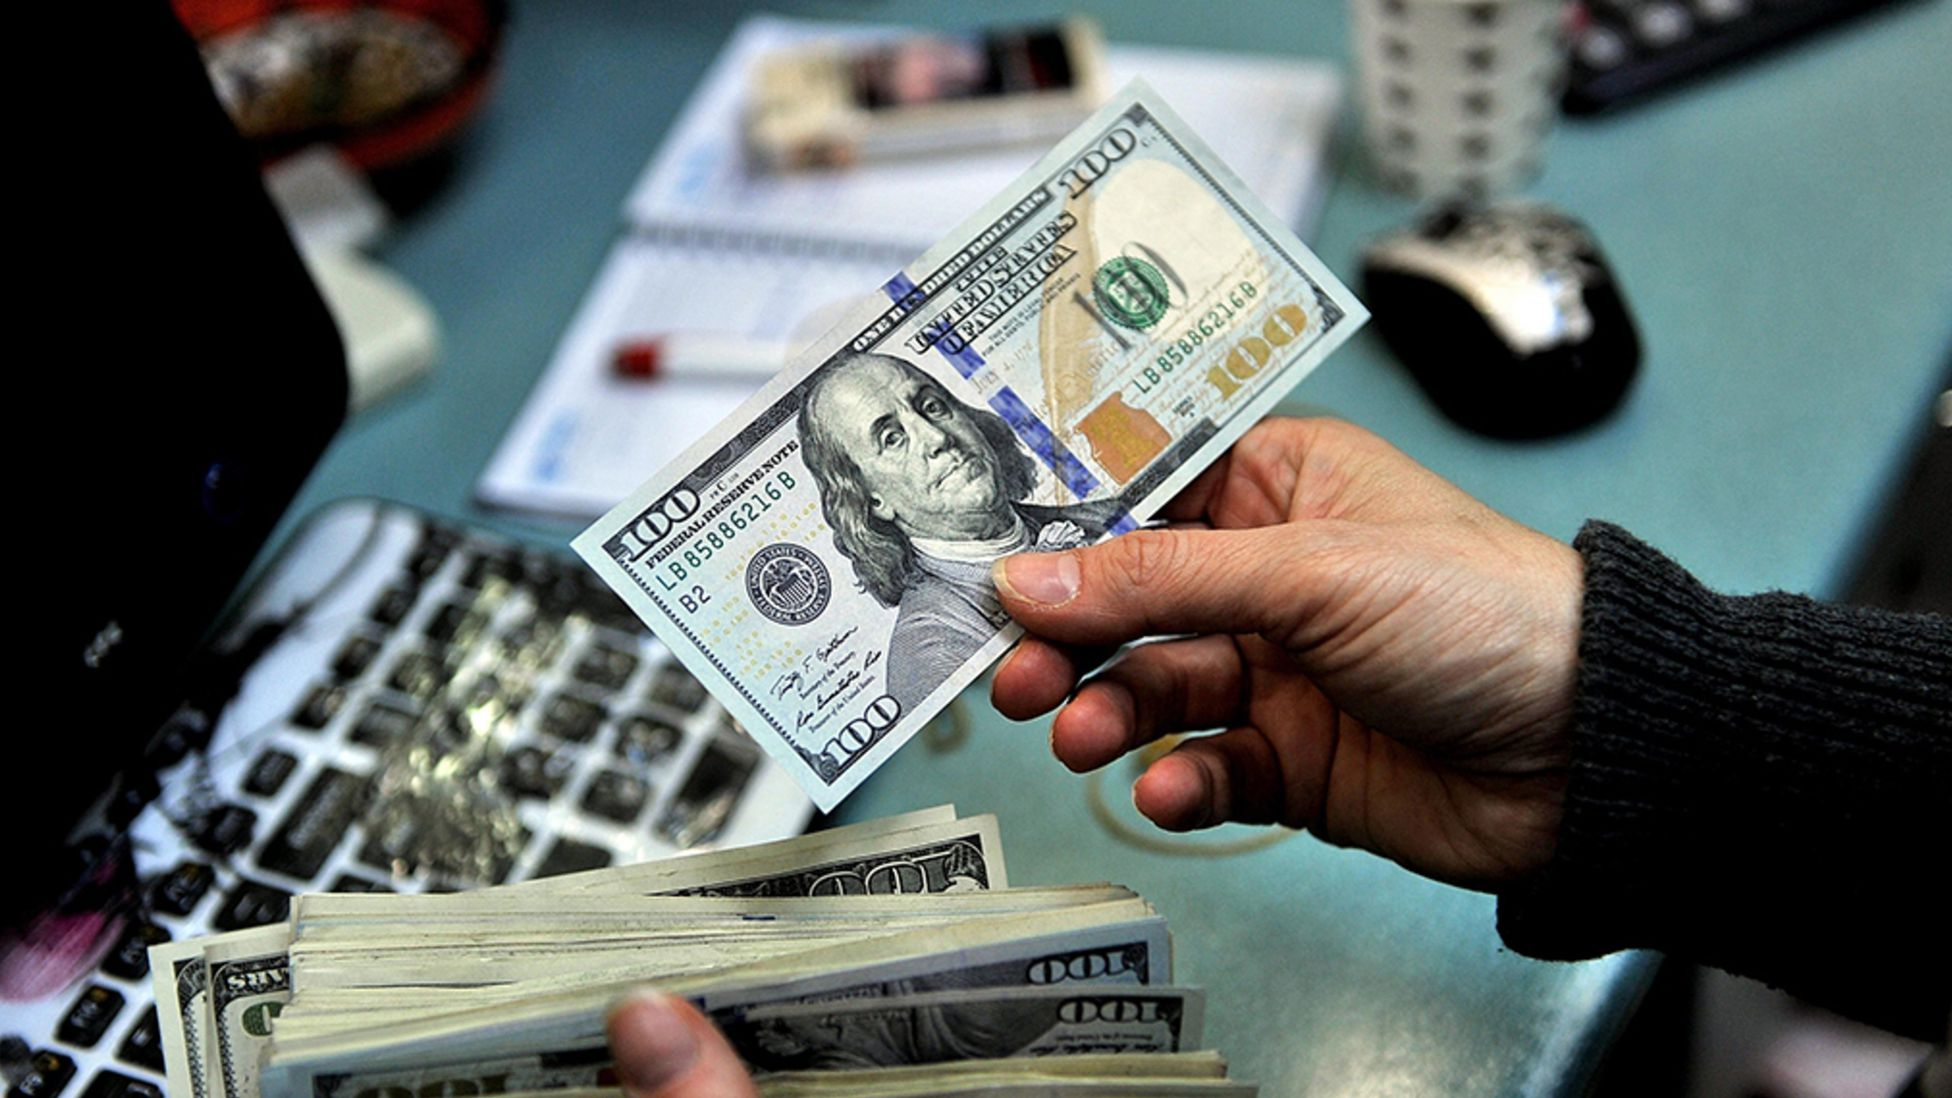

 Nesta base de dados de treinamento que iremos trabalhar, teremos 32.560 registros de pessoas que recebem salarios, menor igual a 50 mil dolares e pessoas que recebem acima de 50 mil dolares.

Conforme é notavel na base de treinamento:

*   a idade media das pessoas é de 38 anos;
*   tempo de estudo médio é de 10 anos;
*   trabalham em media 40 horas semanais;
*   capital ganha é de 1.077 dolares.

Sobre o Genero 66,91% são homens e 33,09% são mulheres, notamos que homens recebem 4 vezes a mais que as mulheres quando se trata de salario acima de 50 mil dolares, conforme figura 1 a baixo.
  
  
  Um dos fatores que podemos considerar o aumento da renda é o tempo em que uma pessoa passa se capacitando, um exemplo nitido é nosso boxplot a baixo localizado na 4º figura.

  Pessoas que recebem renda acima de 50 mil dolares tendem a estudar em media 12 anos, enquanto quem recebe a baixo dos 50 mil, tende a ficar entre 9 a 10 anos estudando, outro fato relevante para colocar no nosso modelo é que pessoas que trabalham em media 45 horas semanais recebem mais, diferentemente dos que trabalham em media 38 horas semanais que recebem a baixo dos 50 mil, conforme figura 2.

  Sobre a figura 5 - é grande a quantidade pessoas que estudam de 1 a 8 e recebem menos que 50 mil dolares, em toda distribuição de renda notamos que a quantidade de pessoas que recebem acima de 50 mil (>50k) só fica maior quando as pessoas passam a estudar a acima de 14 anos.

  Na figura 6 - temos a distribuição de renda maior para pessoas Married-civ-spouse, Never-married, Divorced, tanto para quem recebem a baixo e acima dos 50 mil dolares.

In [134]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [135]:
# CARREGANDO OS DADOS DE TREINAMENTO
train_data = pd.read_csv('/content/wage_train.csv',na_values="?")
train_data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [136]:
# CARREGANDO OS DADOS DE TESTE
test_data = pd.read_csv('/content/wage_test.csv',na_values="?")
test_data.head(2)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
1,1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States


# LIMPEZA, TRATAMENTO E VISUALIZAÇÃO DOS DADOS

In [137]:

# convertendo as colunas com dados numeros (float) para (int)
train_data['education_num'] = train_data['education_num'].astype(int)
train_data['capital_gain'] = train_data['capital_gain'].astype(int)
train_data['capital_loss'] = train_data['capital_loss'].astype(int)
train_data['hours_per_week'] = train_data['hours_per_week'].astype(int)

# convertendo as colunas com dados numeros (float) para (int)
test_data['education_num'] = test_data['education_num'].astype(int)
test_data['capital_gain'] = test_data['capital_gain'].astype(int)
test_data['capital_loss'] = test_data['capital_loss'].astype(int)
test_data['hours_per_week'] = test_data['hours_per_week'].astype(int)

In [138]:
train_data.describe()

,Unnamed: 0,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,16279.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8139.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,16279.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,24419.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,32559.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [139]:
# verificando os dados faltantes e nulos, para fazer um tratamento (preencher ou deleta-los), base de dados de treinamento
train_data.isna().sum(), train_data.isnull().sum()

(Unnamed: 0        0
 age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 yearly_wage       0
 dtype: int64, Unnamed: 0        0
 age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 yearly_wage       0
 dtype: int64)

In [140]:
# verificando os dados faltantes e nulos, para fazer um tratamento (preencher ou deleta-los), base de dados de teste
test_data.isna().sum(), test_data.isnull().sum()

(Unnamed: 0        0
 age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 dtype: int64, Unnamed: 0        0
 age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 dtype: int64)

In [141]:
# conferindo o tipo que cada coluna esta denominada para detectar alguma possivel alteração.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       32560 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education_num   32560 non-null  int64 
 6   marital_status  32560 non-null  object
 7   occupation      32560 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital_gain    32560 non-null  int64 
 12  capital_loss    32560 non-null  int64 
 13  hours_per_week  32560 non-null  int64 
 14  native_country  32560 non-null  object
 15  yearly_wage     32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [142]:
# preenchendo os valores ausentes para não ter falhas no processamento dos dados mas a frente.
test_data = test_data.fillna("")
train_data = train_data.fillna("")

In [143]:
# conferindo se ainda há valores nulos.
train_data.isna().sum(),train_data.isnull().sum()

(Unnamed: 0        0
 age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 yearly_wage       0
 dtype: int64, Unnamed: 0        0
 age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 yearly_wage       0
 dtype: int64)

In [144]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       32560 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education_num   32560 non-null  int64 
 6   marital_status  32560 non-null  object
 7   occupation      32560 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital_gain    32560 non-null  int64 
 12  capital_loss    32560 non-null  int64 
 13  hours_per_week  32560 non-null  int64 
 14  native_country  32560 non-null  object
 15  yearly_wage     32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


## **VISUALIZAÇÃO**

In [145]:
print(train_data['sex'].value_counts())
print(train_data.shape[0])

 Male      21789
 Female    10771
Name: sex, dtype: int64
32560


In [146]:
train_data.describe()

,Unnamed: 0,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,16279.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8139.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,16279.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,24419.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,32559.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## **Figura 1 - Distribuição de Renda**

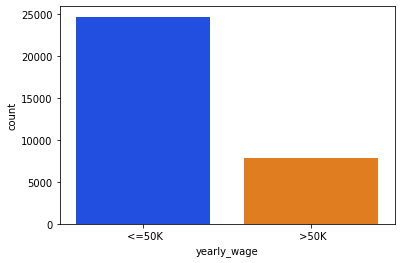

In [147]:

# VISUALIZANDO O NUMEROS DE PESSOAS QUE RECEBEM SALARIOS DE <=50K E >50K
sns.countplot(x=train_data['yearly_wage'], palette="bright");

## **Figura 2 - Boxplot de dados numericos**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

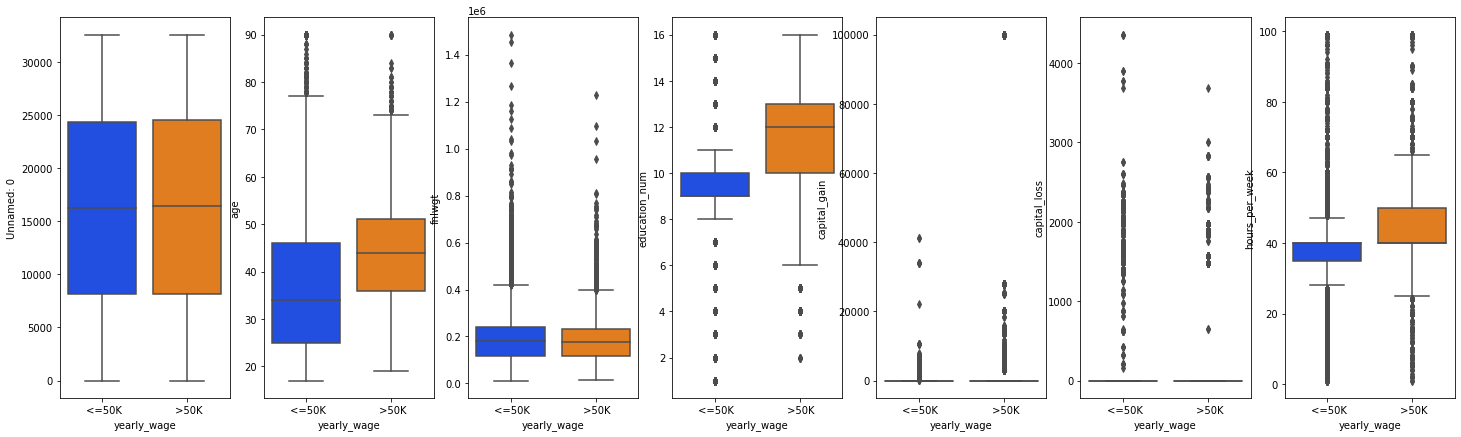

In [148]:
colunas_numericas = train_data.describe().columns
%matplotlib inline
plt.figure(figsize=(25,7))
for i,col in enumerate(colunas_numericas):
    plt.subplot(1,len(colunas_numericas),i+1)
    sns.boxplot(train_data['yearly_wage'],train_data[col], palette="bright");

In [149]:
media1 = train_data.loc[train_data['yearly_wage'] == '>50K']
print(media1['hours_per_week'].mean())

media2 = train_data.loc[train_data['yearly_wage'] == '<=50K']
print(media2['hours_per_week'].mean())

nan
nan


## **Figura 2 - Distribuições - Idade, horas trabalhadas, capital ganho, tempo de estudo**

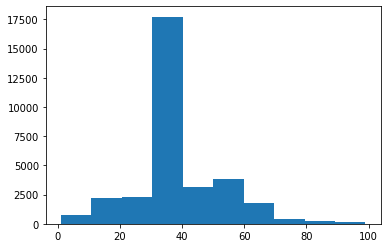

In [150]:
plt.hist(train_data['hours_per_week']);

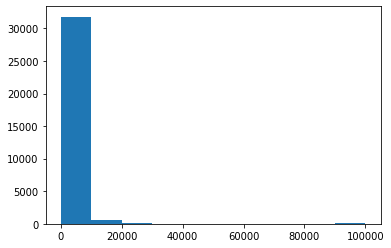

In [151]:
plt.hist(train_data['capital_gain']);

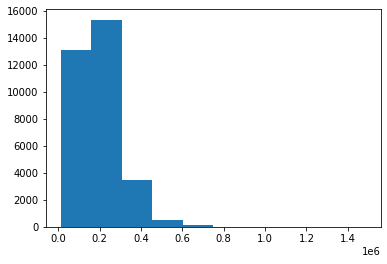

In [152]:
plt.hist(train_data['fnlwgt']);

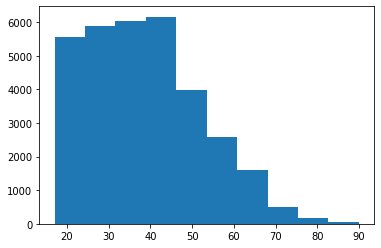

In [153]:
plt.hist(train_data['age']);

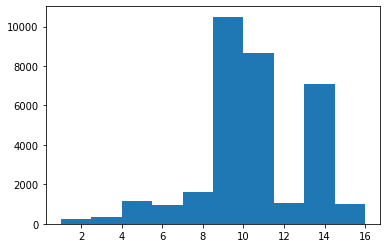

In [154]:
plt.hist(train_data['education_num']);

## **Figura 4 - Renda por Genero**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


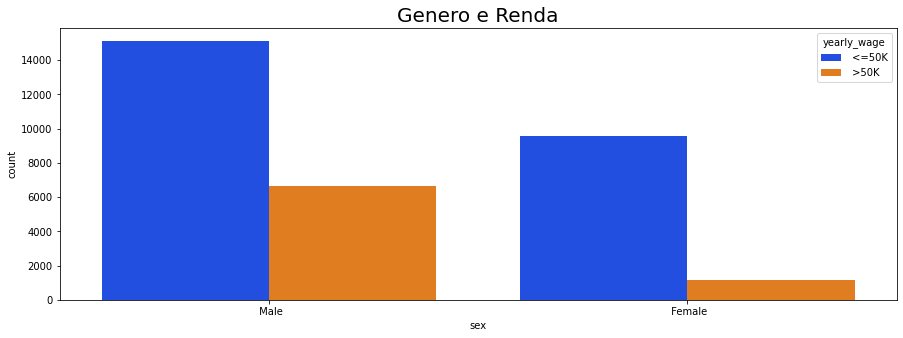

In [155]:
plt.figure(figsize = (15, 5))
plt.title('Genero e Renda', size=20)
sns.countplot(train_data['sex'],hue=train_data['yearly_wage'], palette="bright");

## **Figura 5 - Tempo de Estudo e Renda**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


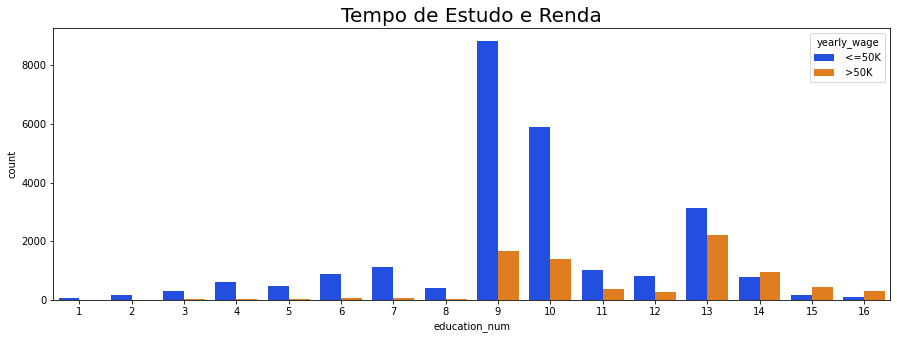

In [156]:
plt.figure(figsize = (15, 5))
plt.title('Tempo de Estudo e Renda', size=20)
sns.countplot(train_data['education_num'],hue=train_data['yearly_wage'], palette="bright");

## **Figura 5 - Classe do trabalhador (Servidor publico ou privado)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


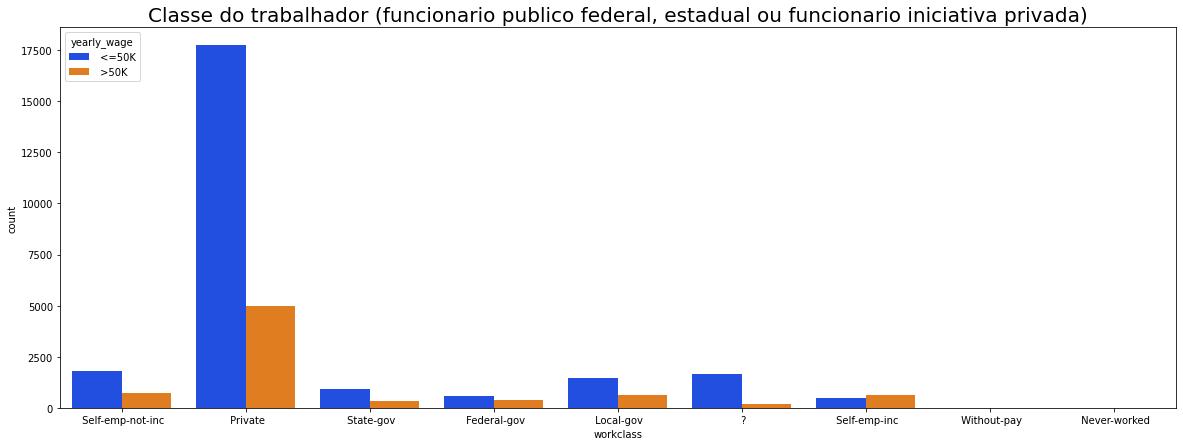

In [157]:
plt.figure(figsize = (20, 7))
plt.title('Classe do trabalhador (funcionario publico federal, estadual ou funcionario iniciativa privada)', size=20)
sns.countplot(train_data['workclass'],hue=train_data['yearly_wage'], palette="bright");

In [158]:
train_data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

## **Figura 6 - Relação do Estado Civil com a Renda**

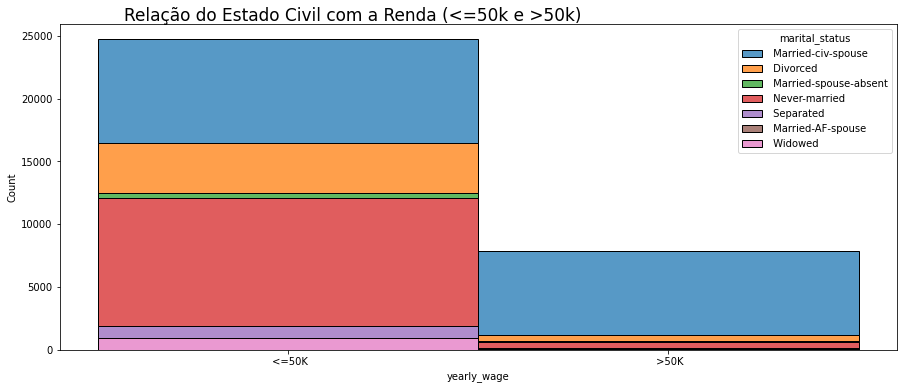

In [159]:
plt.figure(figsize=(15,6));
plt.title('Relação do Estado Civil com a Renda (<=50k e >50k)', size=17, x=0.35, y=0.99)
sns.histplot(binwidth=0.5, x="yearly_wage", hue="marital_status", data=train_data, stat="count", multiple="stack");

In [160]:
train_data['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

## Correlações

In [161]:
!pip install bubble-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,var_1,var_2,value
0,education_num,fnlwgt,-0.043159
1,hours_per_week,capital_loss,0.054256
2,capital_loss,age,0.057775
3,hours_per_week,age,0.068756
4,fnlwgt,age,-0.076646
5,capital_gain,age,0.077674
6,hours_per_week,capital_gain,0.078409
7,capital_loss,education_num,0.079932
8,capital_gain,education_num,0.122627
9,hours_per_week,education_num,0.148127


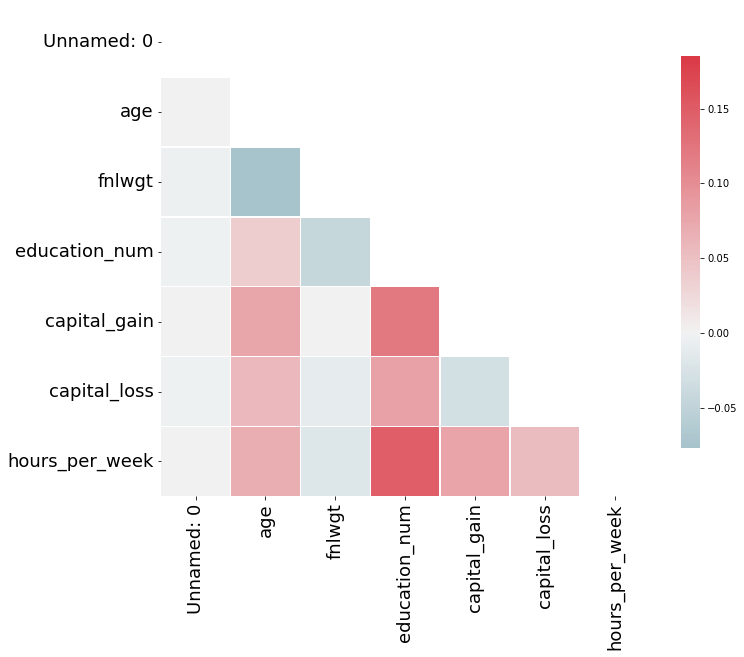

In [162]:
from bubble_plot.utils import get_most_correlated_variables, plot_correlation_matrix

if 'yearly_wage' not in train_data:
    train_data['yearly_wage'] = y
atributos = ['yearly_wage'] + train_data.columns[:16].tolist()
plot_correlation_matrix(train_data, atributos)

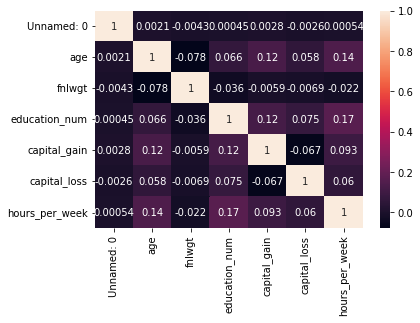

In [163]:
sns.heatmap(train_data.corr('spearman'), annot=True );

Ter recursos irrelevantes no modelo podera diminuir a precisão do algoritmo e fazer com que o modelo aprenda com base em recursos irrelevantes.
Nisto analisando as tabelas de correlação e testando os algoritmos foi notado que as features ***marital_status, education_num, relationship, age,capital_gain,hours_per_week, yearly_wage*** nos apresentaram um melhor resultado no treinamento dos algoritmos.

In [164]:
#  Retirando as features irrelevantes para melhorar a precisão dos modelo.

train_data = train_data[['marital_status','education_num', 'relationship','age', 
                  'capital_gain','hours_per_week','yearly_wage']]

test_data = test_data[['marital_status','education_num', 'relationship','age', 
                  'capital_gain','hours_per_week']]

In [165]:
train_data.head(1)

,marital_status,education_num,relationship,age,capital_gain,hours_per_week,yearly_wage
0,Married-civ-spouse,13,Husband,50,0,13,<=50K


In [166]:
test_data.head(1)

,marital_status,education_num,relationship,age,capital_gain,hours_per_week
0,Married-civ-spouse,9,Husband,38,0,50


In [167]:
# separando os dados de traino e teste
X_train = train_data.iloc[:, 0:6]
y_train = train_data.iloc[:,6]
X_test = test_data.iloc[:,0:6]

print(X_train.shape, y_train.shape, X_test.shape)


(32560, 6) (32560,) (16280, 6)


# **Processamento dos dados**

Se dermos uma olhada na saída acima, podemos ver que existem alguns recursos como 'marital_status' ou 'relationship' que não são numéricos, são categóricos. Os algoritmos de aprendizado de máquina esperam trabalhar com valores numéricos, portanto, esses recursos categóricos devem ser transformados, para transformar esses dados categoricos utilizarei o metodo ***get_dummies***.

In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
# Utilizando onehotencoder para alterar dados categoricos para numeros, assim o algorimo podera criar a previsão
onehot_treinamento = pd.get_dummies(data=X_train, columns=['marital_status','relationship'])
onehot_teste = pd.get_dummies(data=X_test, columns=['marital_status','relationship'])
# colocando a tabela em matriz
X_train = onehot_treinamento.values
X_test = onehot_teste.values


In [170]:
#padronizandos a escalas da nossa matriz
scaler_treinamento = StandardScaler()
X_train = scaler_treinamento.fit_transform(X_train)

#padronizandos a escalas da nossa matriz
scaler_treinamento = StandardScaler()
X_test = scaler_treinamento.fit_transform(X_test)

# DIVIDINDO OS DADOS DE TREINAMENTO (TRAIN E TEST)
Agora, quando todas as variáveis ​​categóricas são transformadas e todos os recursos numéricos são normalizados, precisamos dividir nossos dados em conjuntos de treinamento e teste. Dividimos 70% para treinamento e 30% para teste.

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
# dividindo os dados para em 70 para treinar e 30 para testar o algoritmo
X_train, X_teste, y_train, y_teste = train_test_split(X_train, y_train, test_size= 0.30, random_state = 0)

In [173]:
# verificando o tamanho das divisões
X_train.shape, y_train.shape, X_teste.shape, y_teste.shape, 

((22792, 17), (22792,), (9768, 17), (9768,))

# CRIANDO PREVISÃO UTILIZANDO ALGORITMO NAYVE BAYES 72,48% (DADOS TREINAMENTO)

In [174]:
# metricas para avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# IMPORTANDO A BIBLIOTECA GAUSSIAN
from sklearn.naive_bayes import GaussianNB

In [175]:
teste_salario = GaussianNB()
teste_salario.fit(X_train, y_train)

GaussianNB()

In [176]:
prever_salario = teste_salario.predict(X_teste)

In [177]:
accuracy_score(prever_salario, y_teste)

0.7248157248157249

In [178]:
!pip install scikit-plot
import scikitplot as skplt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


              precision    recall  f1-score   support

       <=50K       0.67      0.95      0.79      5276
        >50K       0.89      0.46      0.61      4492

    accuracy                           0.72      9768
   macro avg       0.78      0.71      0.70      9768
weighted avg       0.77      0.72      0.70      9768



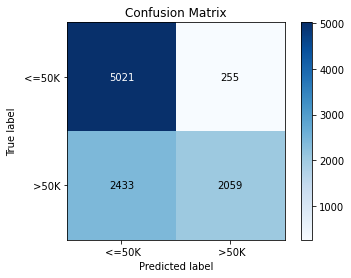

In [179]:
skplt.metrics.plot_confusion_matrix(prever_salario, y_teste)
print(classification_report(prever_salario, y_teste))

Resultado a acurácia deste algoritmo foi de 72%, sendo que o algoritmo acertou 5021 pessoas que recebem menos que 50 mil e 255 pesoas que tambem recebem menos que 50 mil ele classificou errado como ganha a mais (>50k).

O algoritmo encontrou corretamente 2433 pessoas que ganham mais que 50 mil (>50k) e 2059 pessoas que tambem recebem o mesmo valor, ele detectou errado como recebem menos que 50 mil (<=50k)

Com 95% o algoritmo consegue (recall) encontrar pessoas que recebem menos que 50 mil, porem ao entrar ele acertar (precision) 67%. Desta forma, em 46% o algoritmo consegue detectar (recall) pessoas que recebem a menos que 50 mil, e quando ele detecta ele acerta (precision) 89%.

# CRIANDO PREVISÃO UTILIZANDO ALGORITMO RANDON FOREST 84,69% (DADOS TREINAMENTO)

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [181]:
randon_florest_salario = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None,\
max_features = None, min_samples_leaf = 4, min_samples_split = 5, random_state=0)

randon_florest_salario.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=None,
                       min_samples_leaf=4, min_samples_split=5, random_state=0)

In [182]:
random_florest_previsao_salario = randon_florest_salario.predict(X_teste)

In [183]:
accuracy_score(random_florest_previsao_salario, y_teste)

0.846949221949222

              precision    recall  f1-score   support

       <=50K       0.93      0.88      0.90      7831
        >50K       0.60      0.71      0.65      1937

    accuracy                           0.85      9768
   macro avg       0.76      0.80      0.78      9768
weighted avg       0.86      0.85      0.85      9768



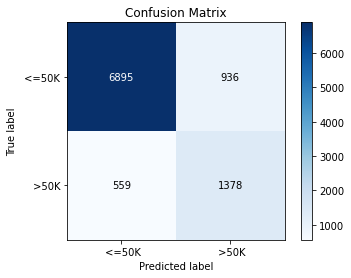

In [184]:
skplt.metrics.plot_confusion_matrix(random_florest_previsao_salario, y_teste)
print(classification_report(random_florest_previsao_salario, y_teste))

Resultado a acurácia deste algoritmo foi de 85%, sendo que o algoritmo acertou 6.895 pessoas que recebem menos que 50 mil (<=50k) e 936 pesoas que tambem recebem menos que 50 mil ele classificou errado como ganha a mais (>50k).

O algoritmo encontrou corretamente 1.378 pessoas que ganham mais que 50 mil (>50k) e 559 pessoas que tambem recebem o mesmo valor, ele detectou errado como recebem menos que 50 mil (<=50k)

Com 88% o algoritmo consegue (recall) encontrar pessoas que recebem menos que 50 mil, porem ao entrar ele acertar (precision) 93%. Desta forma, em 71% o algoritmo consegue detectar (recall) pessoas que recebem a menos que 50 mil, e quando ele detecta ele acerta (precision) 60%.

# CRIANDO PREVISÃO UTILIZANDO ALGORITMO REGRESÃO LOGISTICA 83,99% (DADOS TREINAMENTO)


In [185]:
from sklearn.linear_model import LogisticRegression

logistica_salario = LogisticRegression(random_state = 1)
logistica_salario.fit(X_train, y_train)

print('Nosso Intercepto é:',logistica_salario.intercept_)
print('Os coeficientes são:',logistica_salario.coef_)

Nosso Intercepto é: [-1.90496566]
Os coeficientes são: [[ 0.94090902  0.32285713  2.22165476  0.40488372 -0.18088145  0.03379757
   0.70669894 -0.07606703 -0.49632286 -0.14965052 -0.13548909  0.1174392
   0.13942094 -0.14726965 -0.33153434 -0.01926218  0.15349971]]


In [186]:
previ_reg_logist_salario = logistica_salario.predict(X_teste)

In [187]:
accuracy_score(previ_reg_logist_salario, y_teste)

0.839987714987715

              precision    recall  f1-score   support

       <=50K       0.93      0.87      0.90      7945
        >50K       0.56      0.71      0.62      1823

    accuracy                           0.84      9768
   macro avg       0.74      0.79      0.76      9768
weighted avg       0.86      0.84      0.85      9768



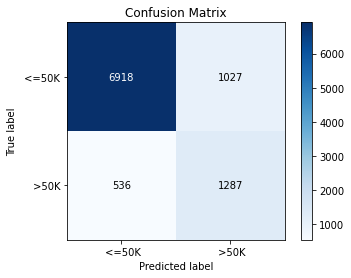

In [188]:
skplt.metrics.plot_confusion_matrix(previ_reg_logist_salario, y_teste)
print(classification_report(previ_reg_logist_salario, y_teste))

Resultado a acurácia deste algoritmo foi de 84%, sendo que o algoritmo acertou 6.918 pessoas que recebem menos que 50 mil e 1027 pesoas que tambem recebem menos que 50 mil ele classificou errado como ganha a mais (>50k).

O algoritmo encontrou corretamente 1.287 pessoas que ganham mais que 50 mil (>50k) e 536 pessoas que tambem recebem o mesmo valor, ele detectou errado como recebem menos que 50 mil (<=50k)

Com 87% o algoritmo consegue (recall) encontrar pessoas que recebem menos que 50 mil, porem ao entrar ele acertar (precision) 93%. Desta forma, em 71% o algoritmo consegue detectar (recall) pessoas que recebem a menos que 50 mil, e quando ele detecta ele acerta (precision) 56%.

# CRIANDO PREVISÃO UTILIZANDO ALGORITMO SVM 84,35% (DADOS TREINAMENTO)

---



In [189]:
from sklearn.svm import SVC

svm_salario = SVC(kernel='rbf', random_state=1, C=1.0) 
svm_salario.fit(X_train,y_train)

previsoes_svm_salario = svm_salario.predict(X_teste)

accuracy_score(previsoes_svm_salario, y_teste)

0.8435708435708436

              precision    recall  f1-score   support

       <=50K       0.94      0.86      0.90      8158
        >50K       0.52      0.74      0.61      1610

    accuracy                           0.84      9768
   macro avg       0.73      0.80      0.76      9768
weighted avg       0.87      0.84      0.85      9768



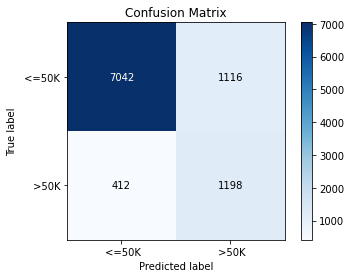

In [190]:
skplt.metrics.plot_confusion_matrix(previsoes_svm_salario, y_teste)
print(classification_report(previsoes_svm_salario, y_teste))

Resultado a acurácia deste algoritmo foi de 84%, sendo que o algoritmo acertou 7.042 pessoas que recebem menos que 50 mil e 1116 pesoas que tambem recebem menos que 50 mil ele classificou errado como ganha a mais (>50k).

O algoritmo encontrou corretamente 1.198 pessoas que ganham mais que 50 mil (>50k) e 412 pessoas que tambem recebem o mesmo valor, ele detectou errado como recebem menos que 50 mil (<=50k)

Com 86% o algoritmo consegue (recall) encontrar pessoas que recebem menos que 50 mil, porem ao entrar ele acertar (precision) 94%. Desta forma, em 74% o algoritmo consegue detectar (recall) pessoas que recebem a menos que 50 mil, e quando ele detecta ele acerta (precision) 52%.

## **CRIANDO PREVISÃO UTILIZANDO ALGORITMO KNN 82,50% (DADOS TREINAMENTO)**

In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
knn_salario = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_salario.fit(X_train,y_train)
previsao_knn_salario = knn_salario.predict(X_teste)

accuracy_score(previsao_knn_salario, y_teste)

0.82504095004095

              precision    recall  f1-score   support

       <=50K       0.91      0.87      0.89      7769
        >50K       0.56      0.65      0.60      1999

    accuracy                           0.83      9768
   macro avg       0.73      0.76      0.75      9768
weighted avg       0.84      0.83      0.83      9768



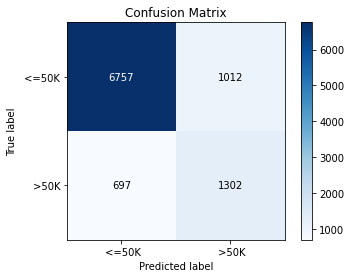

In [193]:
skplt.metrics.plot_confusion_matrix(previsao_knn_salario, y_teste)
print(classification_report(previsao_knn_salario, y_teste))

Resultado a acurácia deste algoritmo foi de 83%, sendo que o algoritmo acertou 6757 pessoas que recebem menos que 50 mil e 1012 pesoas que tambem recebem menos que 50 mil ele classificou errado como ganha a mais (>50k).

O algoritmo encontrou corretamente 1.302 pessoas que ganham mais que 50 mil (>50k) e 697 pessoas que tambem recebem o mesmo valor, ele detectou errado como recebem menos que 50 mil (<=50k)

Com 87% o algoritmo consegue (recall) encontrar pessoas que recebem menos que 50 mil, porem ao entrar ele acertar (precision) 91%. Desta forma, em 65% o algoritmo consegue detectar (recall) pessoas que recebem a menos que 50 mil, e quando ele detecta ele acerta (precision) 56%.

## **TESTANDO O MODELO.**

utilizando modelo Randon Forest que apresentou o melhor resultado na base dados de teste.

In [194]:
randon_florest_salario.fit(X_train, y_train)
y_test = randon_florest_salario.predict(X_test)
y_test[:15]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' >50K',
       ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' >50K',
       ' >50K'], dtype=object)

In [195]:
y_train.head(15)

20721     <=50K
32097      >50K
25205     <=50K
23491     <=50K
12367     <=50K
7054      <=50K
369       <=50K
10984     <=50K
30646     <=50K
343       <=50K
23136     <=50K
9033      <=50K
32046     <=50K
17785      >50K
28330     <=50K
Name: yearly_wage, dtype: object

In [196]:
resultado_salario = pd.DataFrame(data=y_test, columns=["predictedValues"])
resultado_salario = resultado_salario.reset_index()
resultado_salario = resultado_salario.rename(columns={"index": "rowNumber"})
resultado_salario.to_csv("predicted.csv", index=False)
resultado_salario

,rowNumber,predictedValues
0,0,<=50K
1,1,<=50K
2,2,>50K
3,3,<=50K
4,4,<=50K
...,...,...
16275,16275,<=50K
16276,16276,<=50K
16277,16277,>50K
16278,16278,<=50K


# CONCLUSÃO

Alguns dos algoritmos de classificação utilizados aqui do scikit-learn:



*   Gaussian Naive Bayes (GaussianNB) 72,48%
*   Random Forest 84,69%
*   KNN 82,50%
*   Regressão Logística 83,99%

Os pontos fortes do Naive Bayes são seu classificador simples e rápido que fornece bons resultados com pouco ajuste dos hiperparâmetros em seu modelo, enquanto um classificador Regressão Logística funciona bem com um grande número de exemplos de treinamento, ambos trouxeram bons resultado, que podem ser mais trabalhados e aperfeiçoados.